Every bank wants to hold there customers for sustaining their business and thus this anonymous Multinational bank.

Below is the customer data of account holders at Anonymous Multinational bank and the aim of the data will be predicting the Customer Churn

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
from sklearn.preprocessing import OneHotEncoder

In [ ]:
from google.colab import drive, files
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/My Drive/Customer-Churn-Records.csv')
df.head(3)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377


In [ ]:
df.isna().sum()

,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


In [ ]:
df.duplicated().sum()

0

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction Score  10000 non-null  int64  
 16  Card 

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


In [ ]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [ ]:
df.drop(columns=['RowNumber', 'CustomerId', 'Surname'], inplace=True)

In [ ]:
df[['Exited']].value_counts() #needs oversampling

,count
Exited,
0,7962
1,2038


In [ ]:
df.groupby("Gender")["Exited"].mean() * 100


,Exited
Gender,
Female,25.071539
Male,16.474253


In [ ]:
df.groupby("Geography")["Exited"].mean() * 100


,Exited
Geography,
France,16.174711
Germany,32.443204
Spain,16.673395


In [ ]:
df.groupby("NumOfProducts")["Exited"].mean()  * 100

,Exited
NumOfProducts,
1,27.714398
2,7.603486
3,82.706767
4,100.000000


In [ ]:
df.groupby("Complain")["Exited"].mean() * 100


,Exited
Complain,
0,0.050277
1,99.510763


#Insights
- Gender: Female customers have a higher churn rate (25.07%) than male customers (16.47%). This suggests that gender may play a role in customer churn, with female customers more likely to leave

- Geography: Churn rates vary accross countries, with germany having the highest churn rate (32%) followed by spain(16%) and france(16%). This shows that geography may influence churn tendencies.

- Number of products: Customers with 4 products have a 100% churn rate, though this group is small. Customers with 1 product have a churn rate of 27%, indicating that fewer products are associated with higher churn. Those with 2 products have a lower churn rate 7%.

- Credit Score: The average credit score for churned customers is slightly lower (645.41) compared to those who stayed (651.84). This may suggest a link between lower credit scores and higher churn risk.

- Card Type: Churn rates are similar across card types (DIAMOND, GOLD, SILVER, PLATINUM), indicating that card type does not significantly impact churn.

- Tenure: Customers with tenure of 0 months have the highest churn rate(23%), while those with 7 months have the lowest churn rate (17.22%). Shorter tenure periods generally see higher churn

- Balance: Churned customers have higher average balances (91109.48) than those who stayed (72742.75), suggesting that customers with higher balances might be more likely to churn

- Age: Churned customers have a slightly higher average age (44.84) than non-churned customers (37). This suggests older customers may be slightly more likely to churn.

- Complaint: Customers who have lodged complaints (complaint:1) exhibit a very high churn rate (99.51%), while those without complaints (Complaint:0) have a very low churn rate (0.05%). this shows that complaints are a strong predictor of churn.

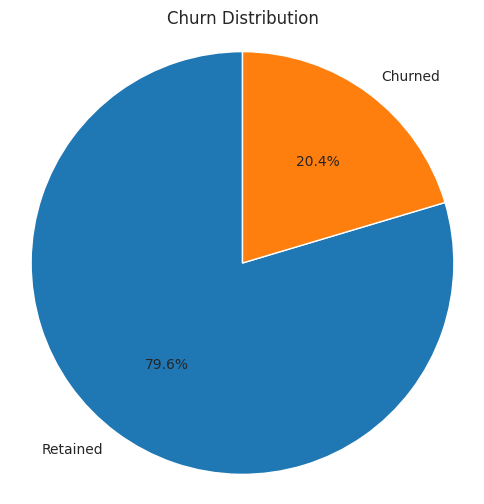

In [ ]:
plt.figure(figsize= (6, 6))
churn_counts = df['Exited'].value_counts()
plt.pie(churn_counts, labels= ['Retained', 'Churned'], autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Churn Distribution')
plt.show()

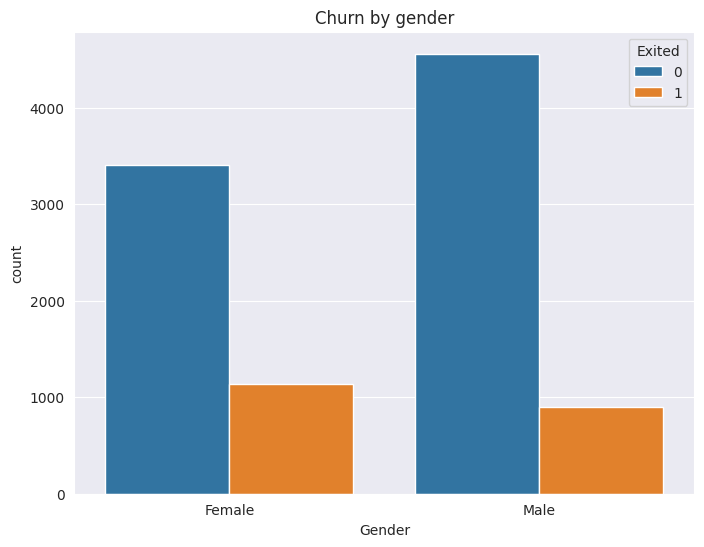

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x= 'Gender', hue='Exited', data=df)
plt.title('Churn by gender')
plt.show()

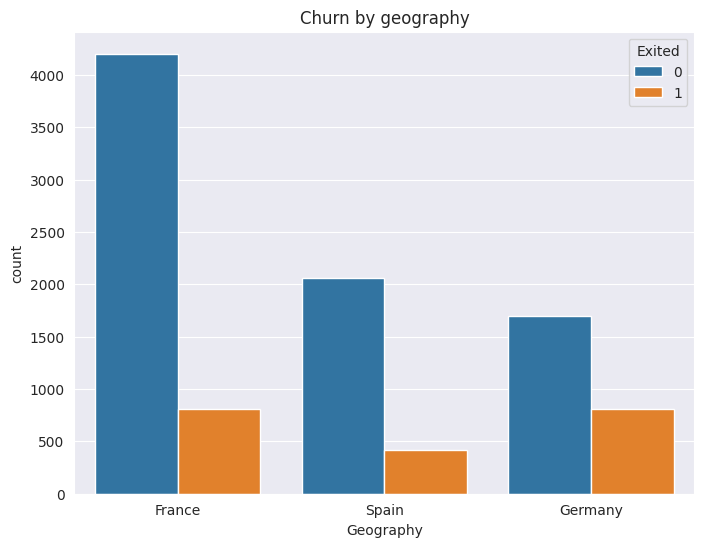

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x= 'Geography', hue='Exited', data=df)
plt.title('Churn by geography')
plt.show()

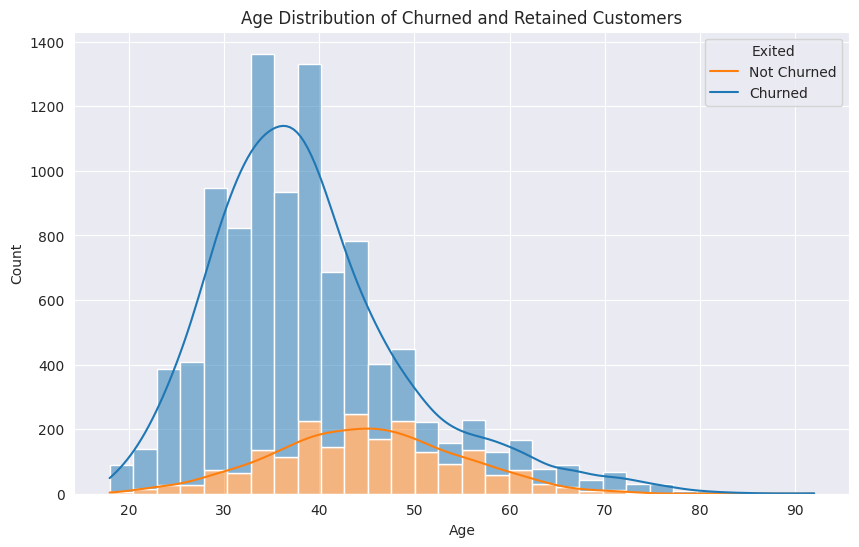

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df, x='Age', hue='Exited', multiple='stack', bins=30, kde= True)
plt.title('Age Distribution of Churned and Retained Customers')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='Exited', loc= 'upper right', labels= ['Not Churned', 'Churned'])
plt.show()

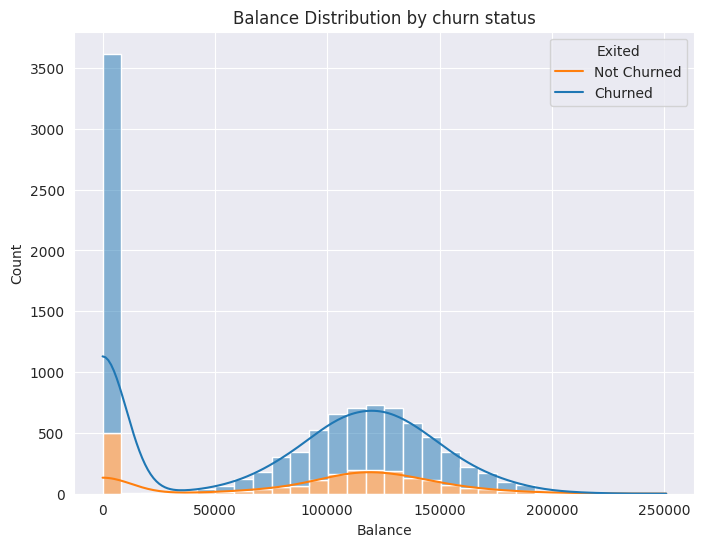

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(df, x='Balance', hue='Exited', multiple='stack', bins=30, kde= True)
plt.title('Balance Distribution by churn status')
plt.xlabel('Balance')
plt.ylabel('Count')
plt.legend(title='Exited', loc= 'upper right', labels= ['Not Churned', 'Churned'])
plt.show()

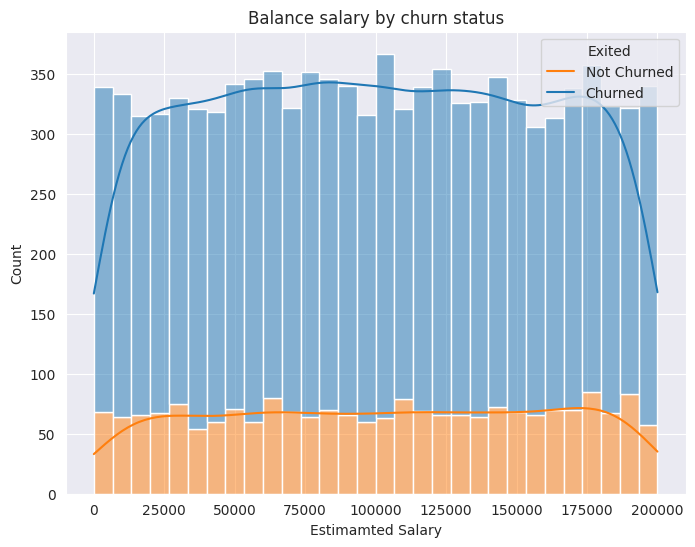

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(df, x='EstimatedSalary', hue='Exited', multiple='stack', bins=30, kde= True)
plt.title('Balance salary by churn status')
plt.xlabel('Estimamted Salary')
plt.ylabel('Count')
plt.legend(title='Exited', loc= 'upper right', labels= ['Not Churned', 'Churned'])
plt.show()

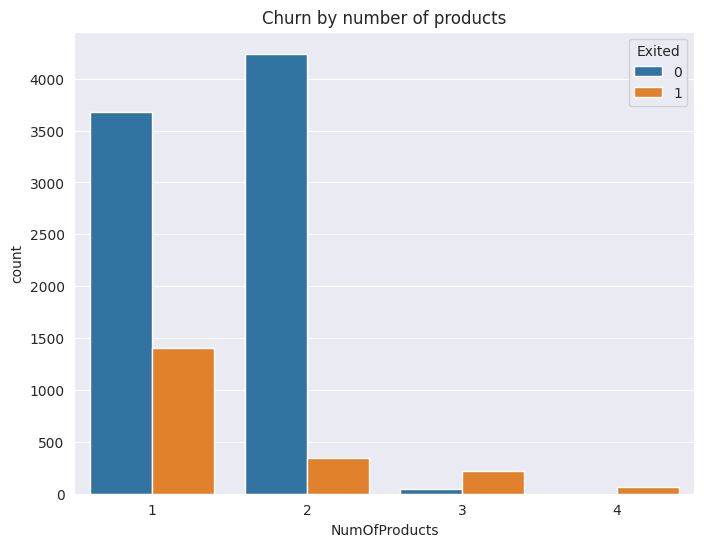

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='NumOfProducts', hue='Exited', data=df)
plt.title('Churn by number of products')
plt.show()

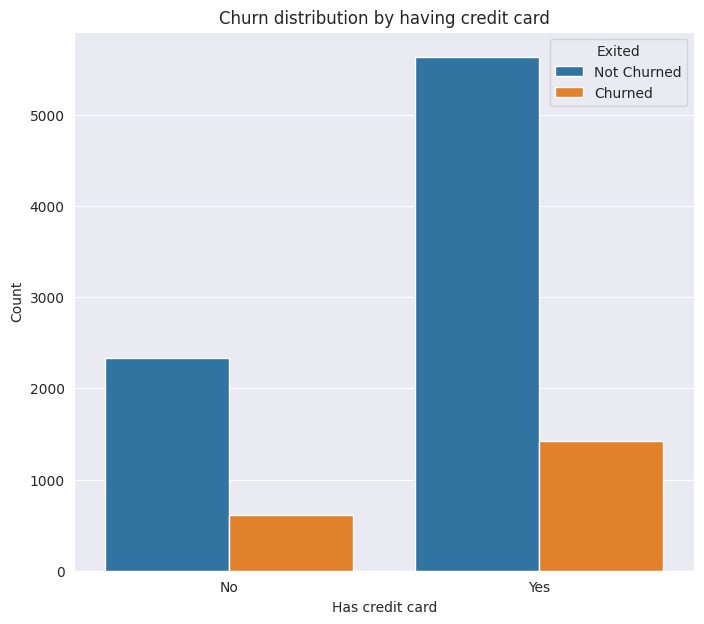

In [ ]:
plt.figure(figsize=(8, 7))
sns.countplot(data=df, x='HasCrCard', hue='Exited')
plt.title('Churn distribution by having credit card')
plt.xlabel('Has credit card')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])
plt.legend(title='Exited', loc='upper right', labels= ['Not Churned', 'Churned'])
plt.show()

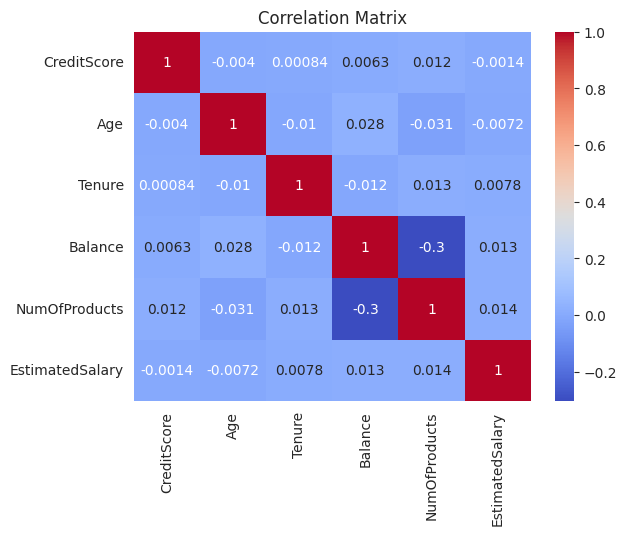

In [ ]:
correlation_matrix = df[['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
cats= df.select_dtypes(include="object").columns
cats

Index(['Geography', 'Gender', 'Card Type'], dtype='object')

In [ ]:
encoder = OneHotEncoder(drop = "first")
x= encoder.fit_transform(df[cats]).toarray()
x = pd.DataFrame(x, columns = encoder.get_feature_names_out())
x= x.astype(int)
temp = df.drop(cats, axis=1)
df = pd.concat([temp, x], axis=1)
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned,Geography_Germany,Geography_Spain,Gender_Male,Card Type_GOLD,Card Type_PLATINUM,Card Type_SILVER
0,619,42,2,0.00,1,1,1,101348.88,1,1,2,464,0,0,0,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,3,456,0,1,0,0,0,0
2,502,42,8,159660.80,3,1,0,113931.57,1,1,3,377,0,0,0,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,5,350,0,0,0,1,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,5,425,0,1,0,1,0,0


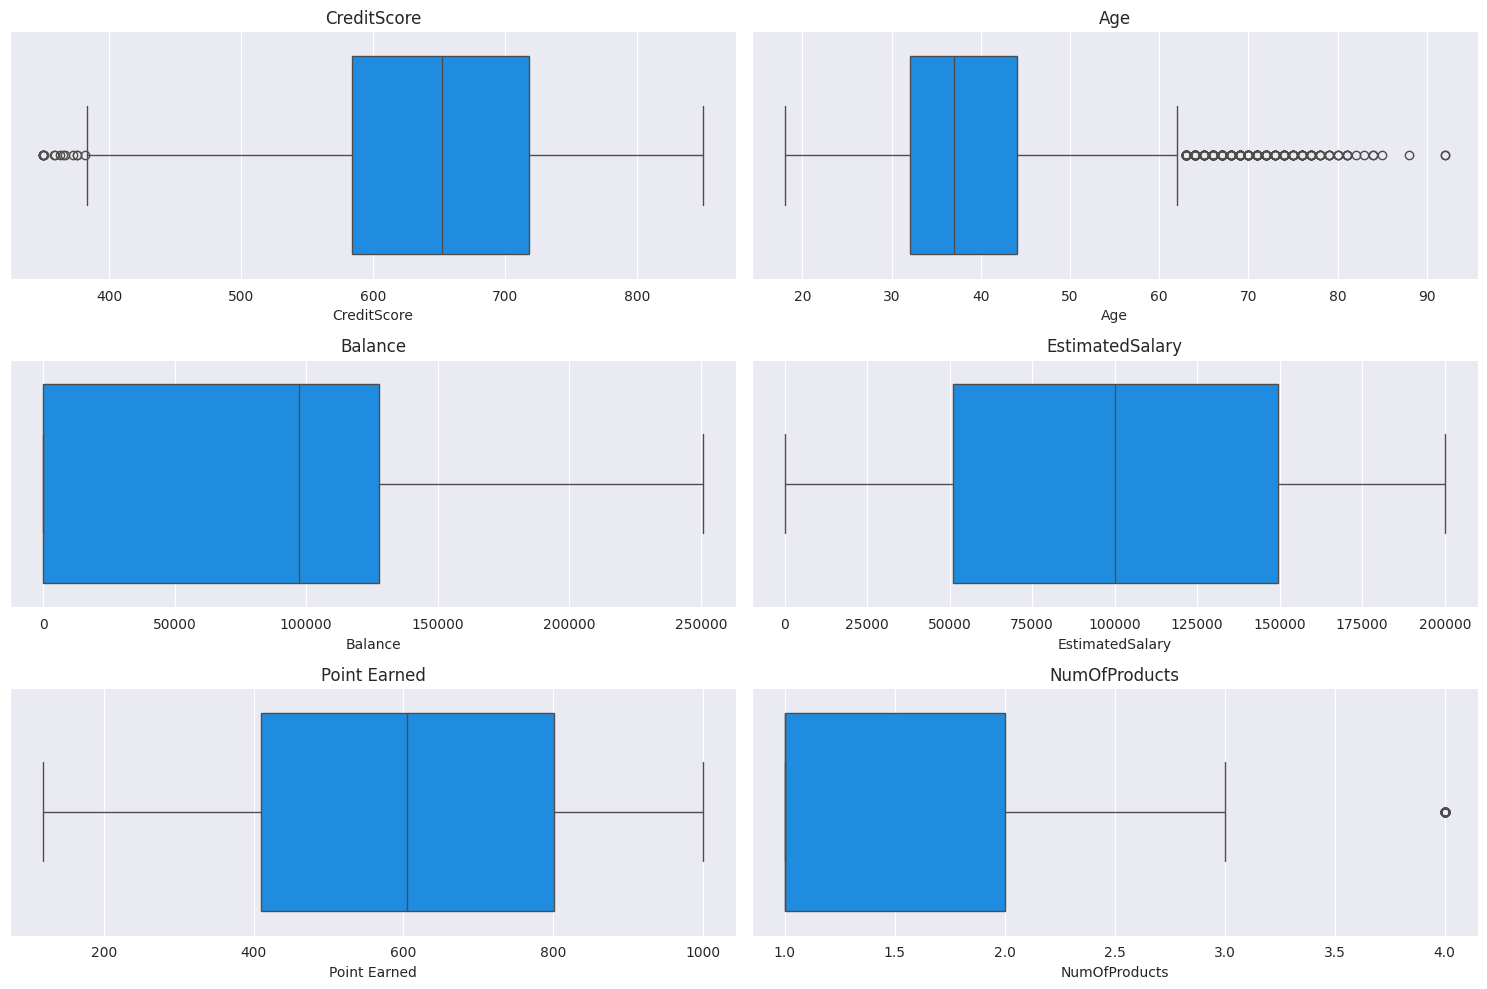

In [ ]:
fig, axes  = plt.subplots(nrows=3, ncols=2, figsize=(15, 10))

sns.boxplot(x= df['CreditScore'], ax=axes[0,0], color='#0090FF')
axes[0, 0].set_title('CreditScore')

sns.boxplot(x= df['Age'], ax=axes[0,1], color='#0090FF')
axes[0, 1].set_title('Age')

sns.boxplot(x= df['Balance'], ax=axes[1,0], color='#0090FF')
axes[1, 0].set_title('Balance')

sns.boxplot(x= df['EstimatedSalary'], ax=axes[1,1], color='#0090FF')
axes[1, 1].set_title('EstimatedSalary')

sns.boxplot(x= df['Point Earned'], ax=axes[2,0], color='#0090FF')
axes[2, 0].set_title('Point Earned')

sns.boxplot(x= df['NumOfProducts'], ax=axes[2,1], color='#0090FF')
axes[2, 1].set_title('NumOfProducts')

plt.tight_layout()
plt.show()

In [ ]:
#Handel outliers
def remove_outliers(df, feature):
  #Calculate Q1 (25th percentile) and Q3 (75th percentile)
  Q1= df[feature].quantile(0.25)
  Q3= df[feature].quantile(0.75)

  #Calculate IQR (interquatile range)
  IQR = Q3- Q1

  #Define lower and upper bounds for outliers
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR

  #Filter the Dataframe to remove outliers
  df_filtered = df[(df[feature] >= lower_bound) & (df[feature] <= upper_bound)]
  return df_filtered

the IQR method identifies outliers as values that are significantly distant from the central bulk of the data.

In [ ]:
#Remove outliers from 'Age" and CreditScore
df_no_outliers = remove_outliers(df, 'Age')
df_no_outliers = remove_outliers(df, 'CreditScore')


In [ ]:
df_no_outliers

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned,Geography_Germany,Geography_Spain,Gender_Male,Card Type_GOLD,Card Type_PLATINUM,Card Type_SILVER
0,619,42,2,0.00,1,1,1,101348.88,1,1,2,464,0,0,0,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,3,456,0,1,0,0,0,0
2,502,42,8,159660.80,3,1,0,113931.57,1,1,3,377,0,0,0,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,5,350,0,0,0,1,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,5,425,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,1,300,0,0,1,0,0,0
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,5,771,0,0,1,0,1,0
9997,709,36,7,0.00,1,0,1,42085.58,1,1,3,564,0,0,0,0,0,1
9998,772,42,3,75075.31,2,1,0,92888.52,1,1,2,339,1,0,1,1,0,0


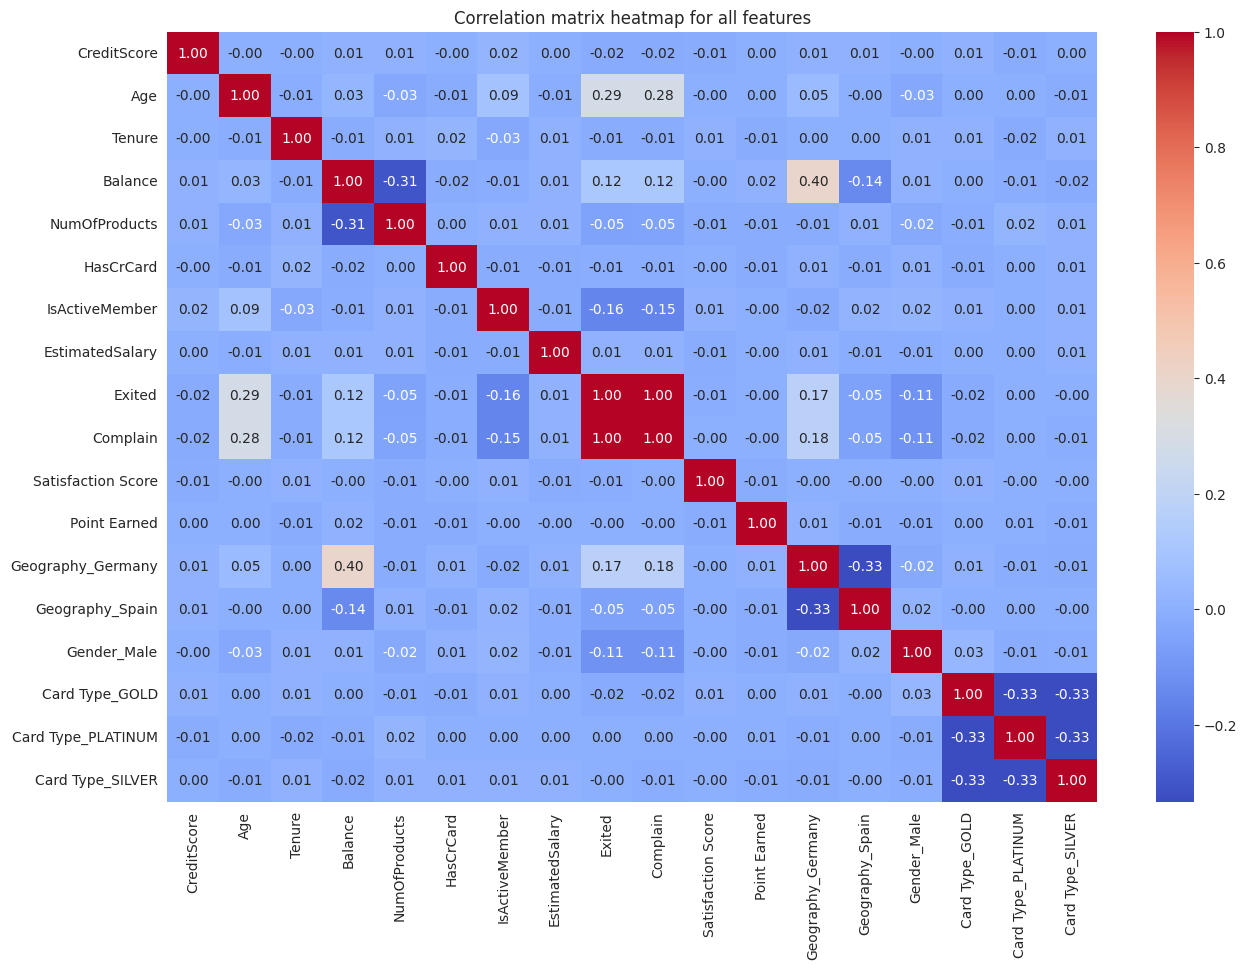

In [ ]:
#Calculat the correlation matrix for all features
correlation_matrix = df_no_outliers.corr()

#plot the heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Correlation matrix heatmap for all features')
plt.show()

In [ ]:
df_no_outliers['total_bal'] = df_no_outliers['Balance'] + df_no_outliers['EstimatedSalary']
df_no_outliers.drop(columns=['EstimatedSalary'], axis=1, inplace=True)

<ipython-input-31-21bf56d3c670>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outliers['total_bal'] = df_no_outliers['Balance'] + df_no_outliers['EstimatedSalary']
<ipython-input-31-21bf56d3c670>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outliers.drop(columns=['EstimatedSalary'], axis=1, inplace=True)


In [ ]:
#drop complan column
df.drop(columns =['Complain'], inplace=True)

In [ ]:
#Splitting the data into train and test
from sklearn.model_selection import train_test_split
X = df.drop(columns = 'Exited')
y = df['Exited']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify= y)

#over sampling kmeanssmote
from imblearn.over_sampling import KMeansSMOTE
kmeans_smote= KMeansSMOTE(sampling_strategy = 0.4, cluster_balance_threshold=0.2)
X_train, y_train = kmeans_smote.fit_resample(X_train, y_train)

X_train_copy = X_train.copy()
X_test_copy = X_test.copy()

#Feature Scaling
scaler= StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#Model building
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)

print(accuracy_score(y_test, y_pred))
confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))

##randomForest

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred= rf.predict(X_test)
print(accuracy_score(y_test, y_pred))
confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))

0.7985
              precision    recall  f1-score   support

           0       0.84      0.92      0.88      1592
           1       0.51      0.32      0.40       408

    accuracy                           0.80      2000
   macro avg       0.68      0.62      0.64      2000
weighted avg       0.77      0.80      0.78      2000

0.8535
              precision    recall  f1-score   support

           0       0.87      0.96      0.91      1592
           1       0.73      0.45      0.56       408

    accuracy                           0.85      2000
   macro avg       0.80      0.70      0.74      2000
weighted avg       0.84      0.85      0.84      2000



In [ ]:
#models to try
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import StackingClassifier
from xgboost import XGBClassifier

models = [SVC(), DecisionTreeClassifier(), GradientBoostingClassifier(), AdaBoostClassifier(), BaggingClassifier(), ExtraTreesClassifier(), KNeighborsClassifier(), SGDClassifier(), GaussianNB(), XGBClassifier()]
model_names =  ['SVC', 'Decision Tree', 'Gradient Boosting', 'AdaBoost', 'Bagging', 'Extra Trees', 'KNN', 'SGD', 'Naive Bayes', 'XGBoost']

accuracy = []
for model in range(len(models)):
  clf= models[model]
  clf.fit(X_train, y_train)
  y_pred= clf.predict(X_test)
  accuracy.append(accuracy_score(y_test, y_pred))
  print(f'Accuracy of {model_names[model]} is {accuracy[model]}')

Accuracy of SVC is 0.843
Accuracy of Decision Tree is 0.79
Accuracy of Gradient Boosting is 0.8465
Accuracy of AdaBoost is 0.8355
Accuracy of Bagging is 0.841
Accuracy of Extra Trees is 0.851
Accuracy of KNN is 0.7905
Accuracy of SGD is 0.8045
Accuracy of Naive Bayes is 0.7875
Accuracy of XGBoost is 0.838


In [ ]:
X_train.shape

(8923, 16)

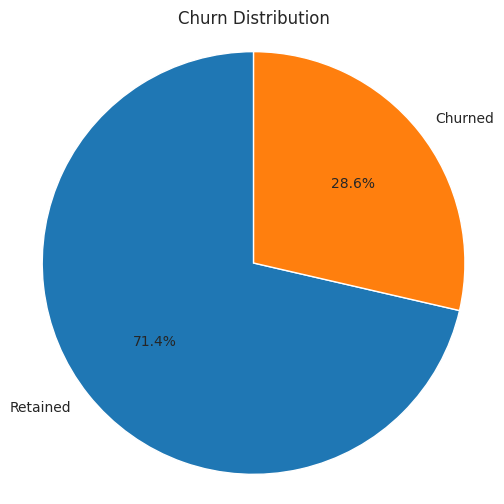

In [ ]:
#Combine x_train and y_train
train = pd.concat([X_train_copy, y_train], axis=1)

#Pie chart of the data churned and not churned
plt.figure(figsize = (6, 6))
churn_counts = train['Exited'].value_counts()
plt.pie(churn_counts, labels=['Retained', 'Churned'], autopct = '%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Churn Distribution')
plt.show()

In [ ]:
train[['Exited']].value_counts()

,count
Exited,
0,6370
1,2553


In [ ]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import f1_score

#Define the models and their corresponding parameter grids
models= [
    RandomForestClassifier(),
    AdaBoostClassifier(),
    XGBClassifier(),
    KNeighborsClassifier(),
    LogisticRegression(),
    DecisionTreeClassifier(),
    GaussianNB()
]

params = [
    {'n_estimators': [50, 100, 200, 300], 'max_depth': [3, 5, 7, 9]},
    {'n_estimators': [50, 100, 200, 300], 'learning_rate': [0.01, 0.1, 1, 10]},
    {'n_estimators': [50, 100, 200, 300], 'learning_rate': [0.01, 0.1, 1, 10], 'max_depth': [3, 5, 7], 'reg_alpha': [0, 0.1, 1], 'reg_lambda': [0, 0.1, 1]},
    {'n_neighbors': [3, 5, 7, 9], 'weights': ['uniform', 'distance'], 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']},
    {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'penalty': ['l1', 'l2'], 'solver': ['liblinear']},
    {'criterion': ['gini', 'entropy'], 'max_depth': [3, 5, 7, 9, 11, 13, 15]},
    {} # Parameters for GaussianNB
]

#initialize an empty dataframe to store the results
df_results = pd.DataFrame()

#iterate through the models and their parameter grids
for i, model in enumerate(models):
  grid= RandomizedSearchCV(model, params[i], cv=8, scoring='f1', n_jobs=-1)
  grid.fit(X_train, y_train)
  y_pred = grid.best_estimator_.predict(X_test)

  #Store the best parameters, scores, and additional metrics
  results = {
      'Model': model.__class__.__name__,
      'Best Parameters': [grid.best_params_],
      'Best CV Score': [grid.best_score_],
      'Test Accuracy': [accuracy_score(y_test, y_pred)],
      'Train Accuracy': [grid.best_estimator_.score(X_train, y_train)],
      'F1 Score': [f1_score(y_test, y_pred)],
      'Scaler': 'StandardScaler',
      'Cm': [confusion_matrix(y_test, y_pred)]
  }

#Convert  the dictionary to a DataFrame and append it to the results DataFrame
  df_results = pd.concat([df_results, pd.DataFrame(results)], ignore_index=True)
  print(f'{model.__class__.__name__} done.')

#Display the results dataframe
print(df_results)



RandomForestClassifier done.
AdaBoostClassifier done.
XGBClassifier done.
KNeighborsClassifier done.
LogisticRegression done.
DecisionTreeClassifier done.
GaussianNB done.
                    Model                                    Best Parameters  \
0  RandomForestClassifier              {'n_estimators': 200, 'max_depth': 9}   
1      AdaBoostClassifier          {'n_estimators': 300, 'learning_rate': 1}   
2           XGBClassifier  {'reg_lambda': 1, 'reg_alpha': 0.1, 'n_estimat...   
3    KNeighborsClassifier  {'weights': 'uniform', 'n_neighbors': 3, 'algo...   
4      LogisticRegression  {'solver': 'liblinear', 'penalty': 'l2', 'C': ...   
5  DecisionTreeClassifier             {'max_depth': 11, 'criterion': 'gini'}   
6              GaussianNB                                                 {}   

   Best CV Score  Test Accuracy  Train Accuracy  F1 Score          Scaler  \
0       0.694617         0.8520        0.901491  0.541796  StandardScaler   
1       0.671579         0.8405  

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


In [ ]:
from sklearn.preprocessing import MinMaxScaler

#minmaxscaler
scaler= MinMaxScaler()
X_train = scaler.fit_transform(X_train_copy)
X_test = scaler.transform(X_test_copy)

In [ ]:

#Define the models and their corresponding parameter grids
models= [
    RandomForestClassifier(),
    AdaBoostClassifier(),
    XGBClassifier(),
    KNeighborsClassifier(),
    LogisticRegression(),
    DecisionTreeClassifier(),
    GaussianNB()
]

params = [
    {'n_estimators': [50, 100, 200, 300], 'max_depth': [3, 5, 7, 9]},
    {'n_estimators': [50, 100, 200, 300], 'learning_rate': [0.01, 0.1, 1, 10]},
    {'n_estimators': [50, 100, 200, 300], 'learning_rate': [0.01, 0.1, 1, 10], 'max_depth': [3, 5, 7], 'reg_alpha': [0, 0.1, 1], 'reg_lambda': [0, 0.1, 1]},
    {'n_neighbors': [3, 5, 7, 9], 'weights': ['uniform', 'distance'], 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']},
    {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'penalty': ['l1', 'l2'], 'solver': ['liblinear']},
    {'criterion': ['gini', 'entropy'], 'max_depth': [3, 5, 7, 9, 11, 13, 15]},
    {} # Parameters for GaussianNB
]


#iterate through the models and their parameter grids
for i, model in enumerate(models):
  grid= RandomizedSearchCV(model, params[i], cv=8, scoring='f1', n_jobs=-1)
  grid.fit(X_train, y_train)
  y_pred = grid.best_estimator_.predict(X_test)

  #Store the best parameters, scores, and additional metrics
  results = {
      'Model': model.__class__.__name__,
      'Best Parameters': [grid.best_params_],
      'Best CV Score': [grid.best_score_],
      'Test Accuracy': [accuracy_score(y_test, y_pred)],
      'Train Accuracy': [grid.best_estimator_.score(X_train, y_train)],
      'F1 Score': [f1_score(y_test, y_pred)],
      'Scaler': 'StandardScaler',
      'Cm': [confusion_matrix(y_test, y_pred)]
  }

#Convert  the dictionary to a DataFrame and append it to the results DataFrame
  df_results = pd.concat([df_results, pd.DataFrame(results)], ignore_index=True)
  print(f'{model.__class__.__name__} done.')

#Display the results dataframe
print(df_results)



RandomForestClassifier done.
AdaBoostClassifier done.
XGBClassifier done.
KNeighborsClassifier done.
LogisticRegression done.
DecisionTreeClassifier done.
GaussianNB done.


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


                     Model                                    Best Parameters  \
0   RandomForestClassifier              {'n_estimators': 200, 'max_depth': 9}   
1       AdaBoostClassifier          {'n_estimators': 300, 'learning_rate': 1}   
2            XGBClassifier  {'reg_lambda': 1, 'reg_alpha': 0.1, 'n_estimat...   
3     KNeighborsClassifier  {'weights': 'uniform', 'n_neighbors': 3, 'algo...   
4       LogisticRegression  {'solver': 'liblinear', 'penalty': 'l2', 'C': ...   
5   DecisionTreeClassifier             {'max_depth': 11, 'criterion': 'gini'}   
6               GaussianNB                                                 {}   
7   RandomForestClassifier               {'n_estimators': 50, 'max_depth': 9}   
8       AdaBoostClassifier          {'n_estimators': 300, 'learning_rate': 1}   
9            XGBClassifier  {'reg_lambda': 0, 'reg_alpha': 0, 'n_estimator...   
10    KNeighborsClassifier  {'weights': 'uniform', 'n_neighbors': 3, 'algo...   
11      LogisticRegression  

In [ ]:
from sklearn.preprocessing import RobustScaler

scaler= RobustScaler()
X_train = scaler.fit_transform(X_train_copy)
X_test = scaler.transform(X_test_copy)

In [ ]:

#Define the models and their corresponding parameter grids
models= [
    RandomForestClassifier(),
    AdaBoostClassifier(),
    XGBClassifier(),
    KNeighborsClassifier(),
    LogisticRegression(),
    DecisionTreeClassifier(),
    GaussianNB()
]

params = [
    {'n_estimators': [50, 100, 200, 300], 'max_depth': [3, 5, 7, 9]},
    {'n_estimators': [50, 100, 200, 300], 'learning_rate': [0.01, 0.1, 1, 10]},
    {'n_estimators': [50, 100, 200, 300], 'learning_rate': [0.01, 0.1, 1, 10], 'max_depth': [3, 5, 7], 'reg_alpha': [0, 0.1, 1], 'reg_lambda': [0, 0.1, 1]},
    {'n_neighbors': [3, 5, 7, 9], 'weights': ['uniform', 'distance'], 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']},
    {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'penalty': ['l1', 'l2'], 'solver': ['liblinear']},
    {'criterion': ['gini', 'entropy'], 'max_depth': [3, 5, 7, 9, 11, 13, 15]},
    {} # Parameters for GaussianNB
]


#iterate through the models and their parameter grids
for i, model in enumerate(models):
  grid= RandomizedSearchCV(model, params[i], cv=8, scoring='f1', n_jobs=-1)
  grid.fit(X_train, y_train)
  y_pred = grid.best_estimator_.predict(X_test)

  #Store the best parameters, scores, and additional metrics
  results = {
      'Model': model.__class__.__name__,
      'Best Parameters': [grid.best_params_],
      'Best CV Score': [grid.best_score_],
      'Test Accuracy': [accuracy_score(y_test, y_pred)],
      'Train Accuracy': [grid.best_estimator_.score(X_train, y_train)],
      'F1 Score': [f1_score(y_test, y_pred)],
      'Scaler': 'StandardScaler',
      'Cm': [confusion_matrix(y_test, y_pred)]
  }

#Convert  the dictionary to a DataFrame and append it to the results DataFrame
  df_results = pd.concat([df_results, pd.DataFrame(results)], ignore_index=True)
  print(f'{model.__class__.__name__} done.')

#Display the results dataframe
print(df_results)



RandomForestClassifier done.
AdaBoostClassifier done.
XGBClassifier done.
KNeighborsClassifier done.
LogisticRegression done.
DecisionTreeClassifier done.
GaussianNB done.
                     Model                                    Best Parameters  \
0   RandomForestClassifier              {'n_estimators': 200, 'max_depth': 9}   
1       AdaBoostClassifier          {'n_estimators': 300, 'learning_rate': 1}   
2            XGBClassifier  {'reg_lambda': 1, 'reg_alpha': 0.1, 'n_estimat...   
3     KNeighborsClassifier  {'weights': 'uniform', 'n_neighbors': 3, 'algo...   
4       LogisticRegression  {'solver': 'liblinear', 'penalty': 'l2', 'C': ...   
5   DecisionTreeClassifier             {'max_depth': 11, 'criterion': 'gini'}   
6               GaussianNB                                                 {}   
7   RandomForestClassifier               {'n_estimators': 50, 'max_depth': 9}   
8       AdaBoostClassifier          {'n_estimators': 300, 'learning_rate': 1}   
9            XGBCl

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


In [ ]:
#Sort df_results by model and test accuracy
df_results.sort_values(by=['Model', 'Test Accuracy'], ascending = [True, False], inplace=True)
df_results.reset_index(drop = True, inplace=True)

print(df_results)

                     Model                                    Best Parameters  \
0       AdaBoostClassifier          {'n_estimators': 300, 'learning_rate': 1}   
1       AdaBoostClassifier          {'n_estimators': 300, 'learning_rate': 1}   
2       AdaBoostClassifier          {'n_estimators': 300, 'learning_rate': 1}   
3   DecisionTreeClassifier          {'max_depth': 11, 'criterion': 'entropy'}   
4   DecisionTreeClassifier             {'max_depth': 11, 'criterion': 'gini'}   
5   DecisionTreeClassifier             {'max_depth': 11, 'criterion': 'gini'}   
6               GaussianNB                                                 {}   
7               GaussianNB                                                 {}   
8               GaussianNB                                                 {}   
9     KNeighborsClassifier  {'weights': 'distance', 'n_neighbors': 9, 'alg...   
10    KNeighborsClassifier  {'weights': 'uniform', 'n_neighbors': 3, 'algo...   
11    KNeighborsClassifier  

#Final Summary

- XGBClassifier- Best overall balance (F1 score and cross-validation score)
- RandomForestClassifier - Best test accuracy (highest precision on test data)
- GaussianNB - Weak performance (lowest F1 score)
- KNeighborsClassifier - Possible overfitting (Train accuracy too high)

In [ ]:
display(df_results)

,Model,Best Parameters,Best CV Score,Test Accuracy,Train Accuracy,F1 Score,Scaler,Cm
0,AdaBoostClassifier,"{'n_estimators': 300, 'learning_rate': 1}",0.671579,0.8405,0.844335,0.562414,StandardScaler,"[[1476, 116], [203, 205]]"
1,AdaBoostClassifier,"{'n_estimators': 300, 'learning_rate': 1}",0.671579,0.8405,0.844335,0.562414,StandardScaler,"[[1476, 116], [203, 205]]"
2,AdaBoostClassifier,"{'n_estimators': 300, 'learning_rate': 1}",0.671579,0.8405,0.844335,0.562414,StandardScaler,"[[1476, 116], [203, 205]]"
3,DecisionTreeClassifier,"{'max_depth': 11, 'criterion': 'entropy'}",0.665577,0.8265,0.916508,0.546405,StandardScaler,"[[1444, 148], [199, 209]]"
4,DecisionTreeClassifier,"{'max_depth': 11, 'criterion': 'gini'}",0.668958,0.8145,0.927603,0.535670,StandardScaler,"[[1415, 177], [194, 214]]"
5,DecisionTreeClassifier,"{'max_depth': 11, 'criterion': 'gini'}",0.668319,0.8125,0.927827,0.528302,StandardScaler,"[[1415, 177], [198, 210]]"
6,GaussianNB,{},0.615692,0.7875,0.804662,0.464061,StandardScaler,"[[1391, 201], [224, 184]]"
7,GaussianNB,{},0.615692,0.7875,0.804662,0.464061,StandardScaler,"[[1391, 201], [224, 184]]"
8,GaussianNB,{},0.615692,0.7875,0.804662,0.464061,StandardScaler,"[[1391, 201], [224, 184]]"
9,KNeighborsClassifier,"{'weights': 'distance', 'n_neighbors': 9, 'alg...",0.648545,0.8135,1.000000,0.461760,StandardScaler,"[[1467, 125], [248, 160]]"


In [ ]:
#Stacking classifier
from sklearn.ensemble import StackingClassifier

#Define the base models
base_models = [
    ('Logistic Regression', LogisticRegression(C=0.001, penalty='l2', solver='liblinear')),
    ('KNN', KNeighborsClassifier(n_neighbors=3)),
    ('Decision Tree', DecisionTreeClassifier(max_depth=12)),
    ('Random Forest', RandomForestClassifier(max_depth=9, n_estimators=50)),
    ('SVC', SVC(C=10, kernel='rbf')),
    ('AdaBoost', AdaBoostClassifier(learning_rate=1, n_estimators=200)),
    ('Gradient Boosting', GradientBoostingClassifier(learning_rate=0.1, n_estimators=300)),
    ('XGBoost', XGBClassifier(learning_rate=0.1, max_depth=3, n_estimators=300, reg_alpha=0.1, reg_lambda=1))
]

#initialize the stacking classifier
stacking_clf= StackingClassifier(estimators=base_models, final_estimator=LogisticRegression())
stimator=LogisticRegression()

#Fit the Stacking Classifier
stacking_clf.fit(X_train, y_train)

#Predict the target
y_pred = stacking_clf.predict(X_test)

#Calculate the accuracy
accuracy= accuracy_score(y_test, y_pred)

#Display the accuracy
print(f'Stacking Classifier Accuracy: {accuracy}')

results = {
    'Model': 'Stacking Classifier',
    'Best Parameters': ['N/A'],
    'Best CV Score:': ['N/A'],
    'Test Accuracy': [accuracy],
    'Train Accuracy': [stacking_clf.score(X_train, y_train)],
    'F1 Score': [f1_score(y_test, y_pred)],
    'Scaler': 'RobustScaler'
}

#Convert the dictionary to a dataframe and append it to the results DataFrame
df_results= pd.concat([df_results, pd.DataFrame(results)], ignore_index=True)

Stacking Classifier Accuracy: 0.8515


The Stacking Classifier is an ensemble machine learning technique that combines predictions from multiple base models to improve overall performance. Instead of simply voting or averaging(as in bagging and boosting), stacking trains a final model(meta-model) to learn the best way to combine the predictions from the base models

In [ ]:
#voting classifier
#Define the base models

base_models = [
    ('Logistic Regression', LogisticRegression(C=0.001, penalty='l2', solver='liblinear')),
    ('KNN', KNeighborsClassifier (n_neighbors=3)),
    ('Decision Tree', DecisionTreeClassifier(max_depth=12)),
    ('Random Forest', RandomForestClassifier(max_depth=9, n_estimators=50)),
    ('SVC', SVC(C=10, kernel='rbf')),
    ('AdaBoost', AdaBoostClassifier(learning_rate=1, n_estimators=200)),
    ('Gradient Boosting', GradientBoostingClassifier(learning_rate=0.1, n_estimators=300)),
    ('XGBoost', XGBClassifier(learning_rate=0.1, max_depth=3, n_estimators=300, reg_alpha=0.1, reg_lambda=1))

]

#initialize the voting classifier
voting_clf= VotingClassifier(estimators=base_models)

#Fit the voting classifier
voting_clf.fit(X_train, y_train)

#Predict the target
y_pred = voting_clf.predict(X_test)

#Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)

#Display the accuracy
print(f'VotingClassifier accuracy: {accuracy}')

#print roc auc score
from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_test, y_pred))

results= {
    'Model': 'Voting Classifier',
    'Best Parameters': ['N/A'],
    'Best CV Score':['N/A'],
    'Test Accuracy': [accuracy],
    'Train Accuracy': ['N/A'],
    'F1 Score': [f1_score(y_test, y_pred)],
    'Scaler':'Robust Scaler',
    'Cm': [confusion_matrix(y_test, y_pred)]
}

#Convert the dictionary to a DataFrame and append it to the results dataframe
df_results = pd.concat([df_results, pd.DataFrame(results)], ignore_index=True)

VotingClassifier accuracy: 0.8535
0.6947051433638782


The result obtained with the VotingClassifier suggests that the final model has an accuracy of 0.8535 on the test test, meaning that, by combining the predictions of all the base models, the final decision of the votingClassifier performed as 85.35%

In [ ]:
display(df_results)

,Model,Best Parameters,Best CV Score,Test Accuracy,Train Accuracy,F1 Score,Scaler,Cm,Best CV Score:
0,AdaBoostClassifier,"{'n_estimators': 300, 'learning_rate': 1}",0.671579,0.8405,0.844335,0.562414,StandardScaler,"[[1476, 116], [203, 205]]",NaN
1,AdaBoostClassifier,"{'n_estimators': 300, 'learning_rate': 1}",0.671579,0.8405,0.844335,0.562414,StandardScaler,"[[1476, 116], [203, 205]]",NaN
2,AdaBoostClassifier,"{'n_estimators': 300, 'learning_rate': 1}",0.671579,0.8405,0.844335,0.562414,StandardScaler,"[[1476, 116], [203, 205]]",NaN
3,DecisionTreeClassifier,"{'max_depth': 11, 'criterion': 'entropy'}",0.665577,0.8265,0.916508,0.546405,StandardScaler,"[[1444, 148], [199, 209]]",NaN
4,DecisionTreeClassifier,"{'max_depth': 11, 'criterion': 'gini'}",0.668958,0.8145,0.927603,0.535670,StandardScaler,"[[1415, 177], [194, 214]]",NaN
5,DecisionTreeClassifier,"{'max_depth': 11, 'criterion': 'gini'}",0.668319,0.8125,0.927827,0.528302,StandardScaler,"[[1415, 177], [198, 210]]",NaN
6,GaussianNB,{},0.615692,0.7875,0.804662,0.464061,StandardScaler,"[[1391, 201], [224, 184]]",NaN
7,GaussianNB,{},0.615692,0.7875,0.804662,0.464061,StandardScaler,"[[1391, 201], [224, 184]]",NaN
8,GaussianNB,{},0.615692,0.7875,0.804662,0.464061,StandardScaler,"[[1391, 201], [224, 184]]",NaN
9,KNeighborsClassifier,"{'weights': 'distance', 'n_neighbors': 9, 'alg...",0.648545,0.8135,1.0,0.461760,StandardScaler,"[[1467, 125], [248, 160]]",NaN


<ipython-input-54-fda7e5fc8c63>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_results, x='Model', y='Test Accuracy', palette='viridis')


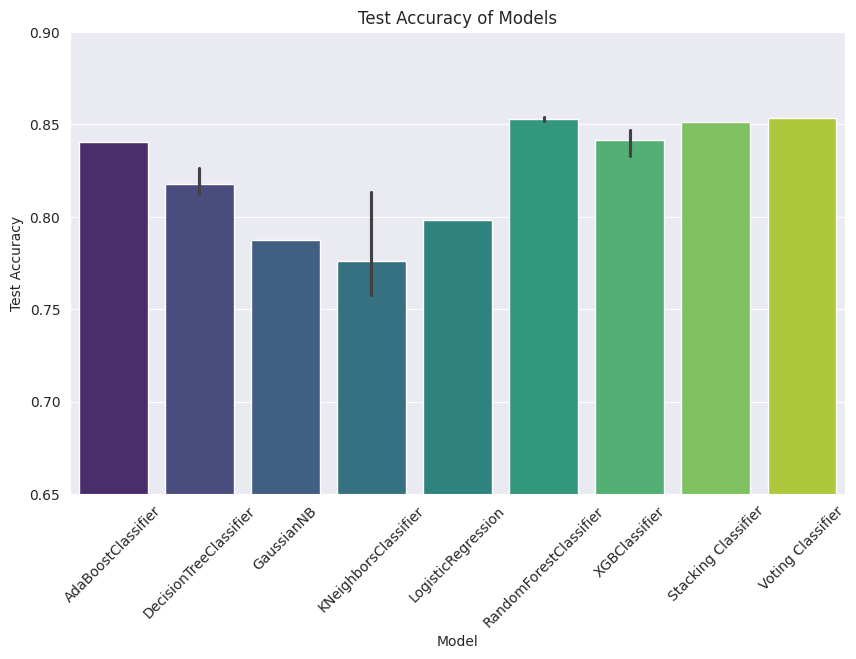

In [ ]:
#Graphical representation of results
plt.figure(figsize=(10, 6))
sns.barplot(data=df_results, x='Model', y='Test Accuracy', palette='viridis')
plt.xticks(rotation = 45)
plt.title('Test Accuracy of Models')
plt.ylim(0.65, 0.9)
plt.show()

<ipython-input-59-bcfde7d4bcab>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_results, x='Scaler', y='Test Accuracy', palette='viridis', ci=None)
<ipython-input-59-bcfde7d4bcab>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_results, x='Scaler', y='Test Accuracy', palette='viridis', ci=None)


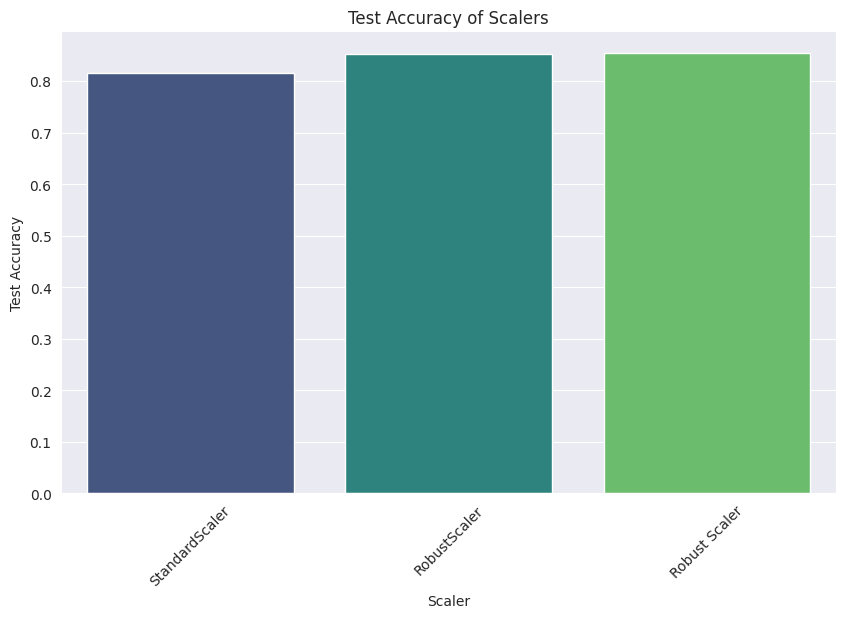

In [ ]:
#which is the best scalar zoom in on the graph
plt.figure(figsize=(10, 6))
sns.barplot(data=df_results, x='Scaler', y='Test Accuracy', palette='viridis', ci=None)
plt.xticks(rotation=45)
plt.title('Test Accuracy of Scalers')
plt.ylim(None, None)
plt.show()

<ipython-input-60-ce6a54405674>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_results, x='Model', y='F1 Score', palette='viridis', ci=None)
<ipython-input-60-ce6a54405674>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_results, x='Model', y='F1 Score', palette='viridis', ci=None)


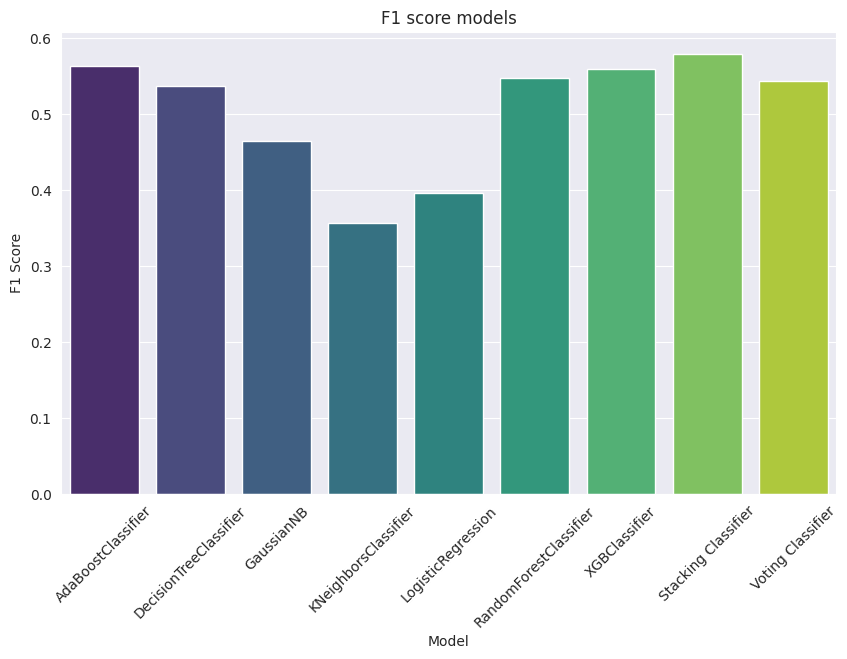

In [ ]:
#graphical representation of f1 score
plt.figure(figsize=(10, 6))
sns.barplot(data=df_results, x='Model', y='F1 Score', palette='viridis', ci=None)
plt.xticks(rotation=45)
plt.title('F1 score models')
plt.ylim(None, None)
plt.show()

In [ ]:
#table each model with its best parameters and scaler and adust column width to accomodate the text in an image format
pd.set_option('display.max_colwidth', None)
df_results

,Model,Best Parameters,Best CV Score,Test Accuracy,Train Accuracy,F1 Score,Scaler,Cm,Best CV Score:
0,AdaBoostClassifier,"{'n_estimators': 300, 'learning_rate': 1}",0.671579,0.8405,0.844335,0.562414,StandardScaler,"[[1476, 116], [203, 205]]",NaN
1,AdaBoostClassifier,"{'n_estimators': 300, 'learning_rate': 1}",0.671579,0.8405,0.844335,0.562414,StandardScaler,"[[1476, 116], [203, 205]]",NaN
2,AdaBoostClassifier,"{'n_estimators': 300, 'learning_rate': 1}",0.671579,0.8405,0.844335,0.562414,StandardScaler,"[[1476, 116], [203, 205]]",NaN
3,DecisionTreeClassifier,"{'max_depth': 11, 'criterion': 'entropy'}",0.665577,0.8265,0.916508,0.546405,StandardScaler,"[[1444, 148], [199, 209]]",NaN
4,DecisionTreeClassifier,"{'max_depth': 11, 'criterion': 'gini'}",0.668958,0.8145,0.927603,0.535670,StandardScaler,"[[1415, 177], [194, 214]]",NaN
5,DecisionTreeClassifier,"{'max_depth': 11, 'criterion': 'gini'}",0.668319,0.8125,0.927827,0.528302,StandardScaler,"[[1415, 177], [198, 210]]",NaN
6,GaussianNB,{},0.615692,0.7875,0.804662,0.464061,StandardScaler,"[[1391, 201], [224, 184]]",NaN
7,GaussianNB,{},0.615692,0.7875,0.804662,0.464061,StandardScaler,"[[1391, 201], [224, 184]]",NaN
8,GaussianNB,{},0.615692,0.7875,0.804662,0.464061,StandardScaler,"[[1391, 201], [224, 184]]",NaN
9,KNeighborsClassifier,"{'weights': 'distance', 'n_neighbors': 9, 'algorithm': 'ball_tree'}",0.648545,0.8135,1.0,0.461760,StandardScaler,"[[1467, 125], [248, 160]]",NaN


In [ ]:
#Sort df_results by test accuracy
df_results.sort_values(by=['Test Accuracy'], ascending=False, inplace=True)
df_results.reset_index(drop=True, inplace=True)

#display the sorted results
display(df_results)

,Model,Best Parameters,Best CV Score,Test Accuracy,Train Accuracy,F1 Score,Scaler,Cm,Best CV Score:
0,RandomForestClassifier,"{'n_estimators': 50, 'max_depth': 9}",0.693189,0.8540,0.901042,0.553517,StandardScaler,"[[1527, 65], [227, 181]]",NaN
1,Voting Classifier,N/A,N/A,0.8535,N/A,0.542902,Robust Scaler,"[[1533, 59], [234, 174]]",NaN
2,RandomForestClassifier,"{'n_estimators': 300, 'max_depth': 9}",0.69392,0.8530,0.902275,0.544892,StandardScaler,"[[1530, 62], [232, 176]]",NaN
3,RandomForestClassifier,"{'n_estimators': 200, 'max_depth': 9}",0.694617,0.8520,0.901491,0.541796,StandardScaler,"[[1529, 63], [233, 175]]",NaN
4,Stacking Classifier,N/A,NaN,0.8515,0.912025,0.578723,RobustScaler,NaN,N/A
5,XGBClassifier,"{'reg_lambda': 0, 'reg_alpha': 0, 'n_estimators': 100, 'max_depth': 5, 'learning_rate': 0.1}",0.719266,0.8470,0.903284,0.559078,StandardScaler,"[[1500, 92], [214, 194]]",NaN
6,XGBClassifier,"{'reg_lambda': 0.1, 'reg_alpha': 1, 'n_estimators': 200, 'max_depth': 7, 'learning_rate': 0.1}",0.723564,0.8440,0.982741,0.555556,StandardScaler,"[[1493, 99], [213, 195]]",NaN
7,AdaBoostClassifier,"{'n_estimators': 300, 'learning_rate': 1}",0.671579,0.8405,0.844335,0.562414,StandardScaler,"[[1476, 116], [203, 205]]",NaN
8,AdaBoostClassifier,"{'n_estimators': 300, 'learning_rate': 1}",0.671579,0.8405,0.844335,0.562414,StandardScaler,"[[1476, 116], [203, 205]]",NaN
9,AdaBoostClassifier,"{'n_estimators': 300, 'learning_rate': 1}",0.671579,0.8405,0.844335,0.562414,StandardScaler,"[[1476, 116], [203, 205]]",NaN


In [ ]:
best = df_results.iloc[0]
best

,0
Model,RandomForestClassifier
Best Parameters,"{'n_estimators': 50, 'max_depth': 9}"
Best CV Score,0.693189
Test Accuracy,0.854
Train Accuracy,0.901042
F1 Score,0.553517
Scaler,StandardScaler
Cm,"[[1527, 65], [227, 181]]"
Best CV Score:,NaN
